In [ ]:
# !unzip -qq "/content/drive/MyDrive/데이콘/WebLog Analytic/open.zip" -d "/content/drive/MyDrive/데이콘/WebLog Analytic"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("rocket")

In [2]:
# 데이터 로드

train = pd.read_csv("/content/drive/MyDrive/Commit/ML_project/WebLog/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Commit/ML_project/WebLog/data/test.csv")

train.shape, test.shape

((252289, 19), (79786, 18))

In [3]:
# 제출 샘플 확인
sample = pd.read_csv("/content/drive/MyDrive/Commit/ML_project/WebLog/data/sample_submission.csv")
sample.head()

,sessionID,TARGET
0,SESSION_252289,0
1,SESSION_252290,0
2,SESSION_252291,0
3,SESSION_252292,0
4,SESSION_252293,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79786 entries, 0 to 79785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessionID            79786 non-null  object 
 1   userID               79786 non-null  object 
 2   browser              79786 non-null  object 
 3   OS                   79786 non-null  object 
 4   device               79786 non-null  object 
 5   new                  79786 non-null  int64  
 6   quality              79786 non-null  float64
 7   duration             79786 non-null  float64
 8   bounced              79786 non-null  int64  
 9   transaction          79786 non-null  float64
 10  transaction_revenue  79786 non-null  float64
 11  continent            79786 non-null  object 
 12  subcontinent         79786 non-null  object 
 13  country              79786 non-null  object 
 14  traffic_source       79786 non-null  object 
 15  traffic_medium       79786 non-null 

# Column 설명
sessionID : 세션 ID

userID : 사용자 ID

TARGET : 세션에서 발생한 총 조회수

browser : 사용된 브라우저

OS : 사용된 기기의 운영체제

device : 사용된 기기

new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)

quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)

duration : 총 세션 시간 (단위: 초)

bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)

transaction : 세션 내에서 발생의 거래의 수

transaction_revenue : 총 거래 수익

continent : 세션이 발생한 대륙

subcontinent : 세션이 발생한 하위 대륙

country : 세션이 발생한 국가

traffic_source : 트래픽이 발생한 소스

traffic_medium : 트래픽 소스의 매체

keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정

referral_path : traffic_medium이 referral인 경우 설정되는 경로

In [6]:
train.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [7]:
test.head()

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088


In [8]:
train.drop(["userID", "sessionID"], axis = 1,inplace = True)

test_ID = test["sessionID"]
test.drop(["userID", "sessionID"], axis = 1,inplace = True)

train.shape, test.shape

((252289, 17), (79786, 16))

### Column Check

In [9]:
# TARGET Column Check

train["TARGET"].describe()

count    252289.000000
mean          3.592626
std           5.509465
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         386.000000
Name: TARGET, dtype: float64

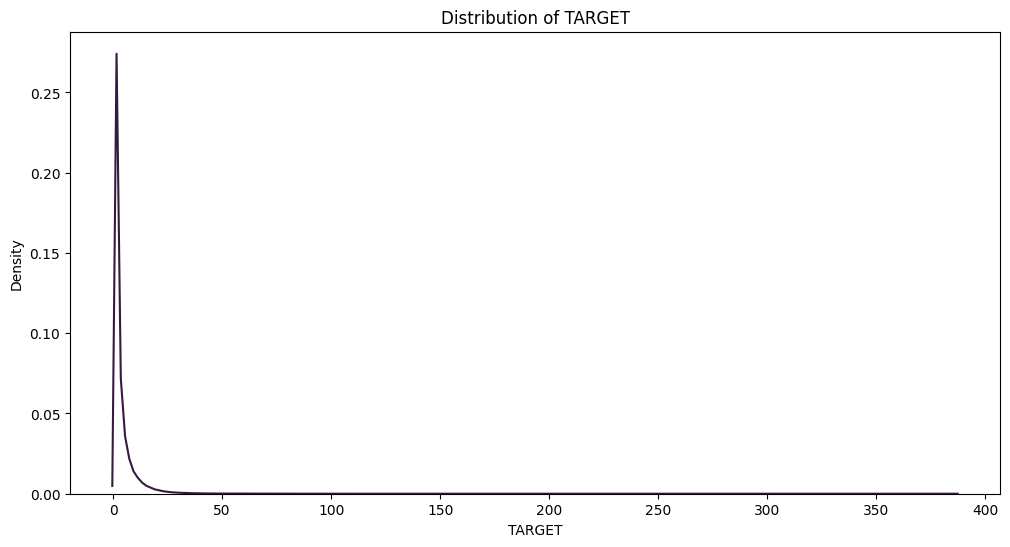

In [45]:
plt.figure(figsize=(12,6))
sns.kdeplot(x="TARGET", data = train)
plt.title("Distribution of TARGET")
plt.show()

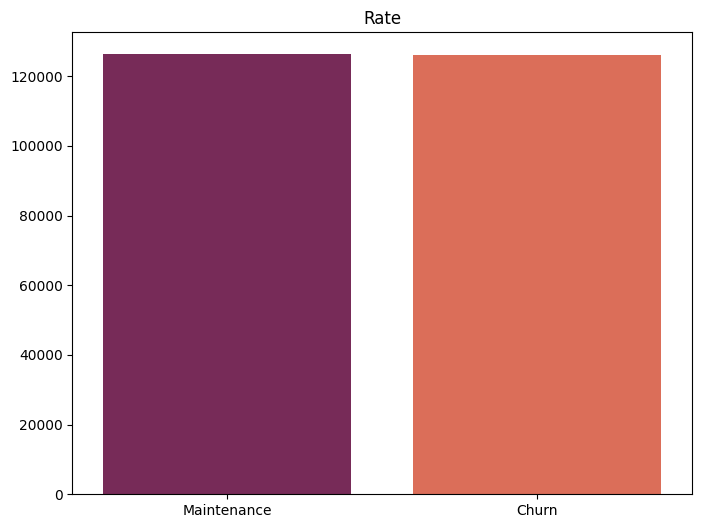

In [11]:
maint = len(train.loc[train["TARGET"] > 1])
churn = len(train.loc[train["TARGET"] <= 1])

plt.figure(figsize = (8, 6))
sns.barplot(x=["Maintenance", "Churn"], y=[maint, churn], hue = ["Maintenance", "Churn"], legend = False, palette="rocket")
plt.title("Rate")
plt.show()

In [12]:
train.columns

Index(['TARGET', 'browser', 'OS', 'device', 'new', 'quality', 'duration',
       'bounced', 'transaction', 'transaction_revenue', 'continent',
       'subcontinent', 'country', 'traffic_source', 'traffic_medium',
       'keyword', 'referral_path'],
      dtype='object')

In [90]:
# check the type of Columns(Numeric Vs. categoric)
cat_columns = []
num_columns = []

for column in train.columns:
    if train[column].dtype == "object":
        cat_columns.append(column)
    else:
        num_columns.append(column)

print(f"The Number of Categorical Column: {len(cat_columns)}")
print(f"Categorical Columns: {cat_columns}")
print(f"The Number of Numeric Column: {len(num_columns)}")
print(f"Numeric Columns: {num_columns}")

The Number of Categorical Column: 10
Categorical Columns: ['browser', 'OS', 'device', 'continent', 'subcontinent', 'country', 'traffic_source', 'traffic_medium', 'keyword', 'referral_path']
The Number of Numeric Column: 7
Numeric Columns: ['TARGET', 'new', 'quality', 'duration', 'bounced', 'transaction', 'transaction_revenue']


In [13]:
# check the categorical Column(browser)
print(train["browser"].unique())

['Chrome' 'Samsung Internet' 'Firefox' 'Opera' 'Safari (in-app)' 'Edge'
 'Safari' 'Android Webview' 'UC Browser' 'Internet Explorer' 'Opera Mini'
 'BlackBerry' 'Android Browser' 'Amazon Silk' 'Coc Coc' 'YaBrowser'
 'Nintendo Browser' 'Nokia Browser' 'MRCHROME' 'Puffin'
 'Mozilla Compatible Agent' 'Maxthon' '+Simple Browser' 'Apple-iPhone7C2'
 'Playstation Vita Browser' 'osee2unifiedRelease' 'SAMSUNG-SM-B355E Opera'
 'DESKTOP' 'Iron' 'Browser' 'rpfanjzoxyemsgbtichqkudwlv'
 'cajrnbtvqwfkolzyxushpdgime' 'wvsmagudcqeytijorlhxnfzkbp'
 'efkaxnbyohqtspzlvcwrjmigdu' 'bsfnwveckhgpdoyjxmizruqtla' 'Mozilla'
 'Konqueror' 'Netscape' 'Amazon.com' 'SeaMonkey'
 ';__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;'
 'eosutpkiahjzvdgcwxlmyfqbrn' 'cnwmpegudakrqzljtvfxohbysi'
 'fspmihbxzowgnuctrqykjlvade' 'YE'
 ';__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;'
 'dkagwlhmfqxercuozpnbvtsiyj' 'kqebrzuwmiycxdvtoljnhsfpga'
 'ohukwejvqmdtibfrzpycgxanls' 'Seznam'
 ';__CT_JOB_ID__:fe02e46f-b6ae-41f1-8563-3b

In [14]:
# Top 10 Browser Counts and Ratio
data = train['browser'].value_counts(normalize = True)[:15].to_frame("Ratio").join(
    train['browser'].value_counts(normalize = False)[:15].to_frame("Counts")
)
data

,Ratio,Counts
Chrome,0.691251,174395
Safari,0.141461,35689
Android Webview,0.054917,13855
Firefox,0.033438,8436
Internet Explorer,0.018126,4573
Edge,0.014674,3702
Samsung Internet,0.012196,3077
Opera Mini,0.012054,3041
Safari (in-app),0.007908,1995
Opera,0.005276,1331


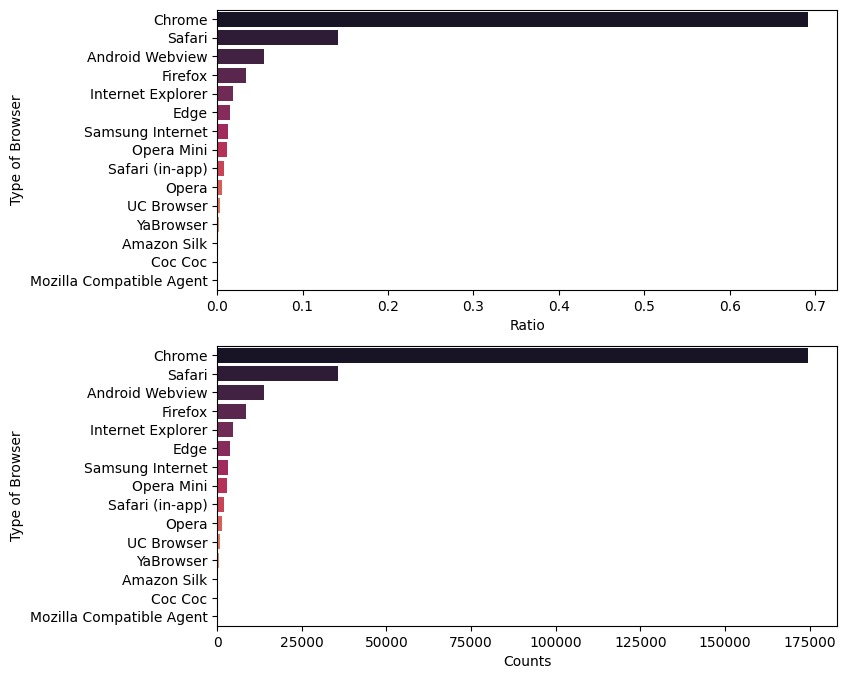

In [15]:
fig, ax = plt.subplots(nrows = 2, figsize = (8, 8))
sns.barplot(data = data, x = 'Ratio', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[0])
ax[0].set_xlabel("Ratio")
ax[0].set_ylabel("Type of Browser")

sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[1])
ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Type of Browser")
plt.show()

In [16]:
# Check similar browsers
for value in train["browser"].unique():
    if 'Android' in value:
        print(value)

for value in train["browser"].unique():
    if 'Safari' in value:
        print(value)

for value in train["browser"].unique():
    if 'Opera' in value:
        print(value)

Android Webview
Android Browser
Safari (in-app)
Safari
Opera
Opera Mini
SAMSUNG-SM-B355E Opera


In [17]:
# Check similar browsers
for value in test["browser"].unique():
    if 'Android' in value:
        print(value)

for value in test["browser"].unique():
    if 'Safari' in value:
        print(value)

for value in test["browser"].unique():
    if 'Opera' in value:
        print(value)

Android Webview
Android Browser
Safari
Safari (in-app)
Opera Mini
Opera


In [18]:
browsers = ["Android Browser", "Safari", "Opera"]
for browser in browsers:
    for value in train["browser"].unique():
        if browser in value:
            train["browser"] = train["browser"].replace(value, browser)

for browser in browsers:
    for value in test["browser"].unique():
        if browser in value:
            test["browser"] = test["browser"].replace(value, browser)

In [19]:
data = train['browser'].value_counts(normalize = True)[:15].to_frame("Ratio").join(
    train['browser'].value_counts(normalize = False)[:15].to_frame("Counts")
)
data

,Ratio,Counts
Chrome,0.691251,174395
Safari,0.149368,37684
Android Webview,0.054917,13855
Firefox,0.033438,8436
Internet Explorer,0.018126,4573
Opera,0.017337,4374
Edge,0.014674,3702
Samsung Internet,0.012196,3077
UC Browser,0.003571,901
YaBrowser,0.001593,402


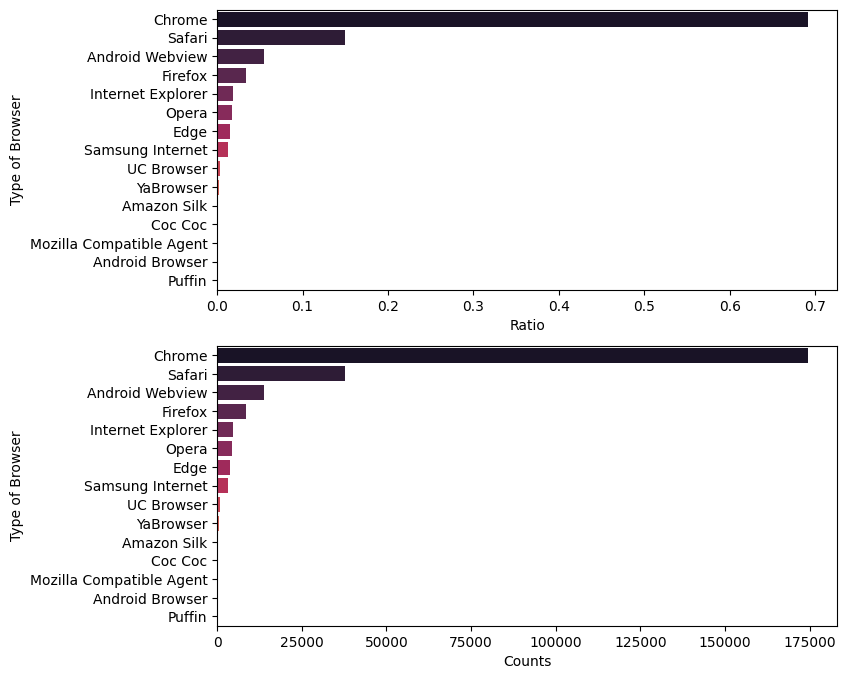

In [20]:
fig, ax = plt.subplots(nrows = 2, figsize = (8, 8))
sns.barplot(data = data, x = 'Ratio', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[0])
ax[0].set_xlabel("Ratio")
ax[0].set_ylabel("Type of Browser")

sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[1])
ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Type of Browser")
plt.show()

In [21]:
# 주요 브라우저와 others 비율, Count 확인
main = ["Chrome"]
others_train = [x for x in train["browser"].unique() if x not in main]
others_test = [x for x in test["browser"].unique() if x not in main]

check_db = train.copy()
check_db["category"] = check_db["browser"].apply(lambda x: "main" if x in main else "others")

In [22]:
print((check_db["category"] == "main").sum())
print((check_db["category"] == "others").sum())

174395
77894


In [23]:
# Browser 정리
train["browser"] = train["browser"].apply(lambda x: "Other" if x in others_train else x)
print(train["browser"].unique())

test["browser"] = test["browser"].apply(lambda x: "Other" if x in others_test else x)
print(test["browser"].unique())

['Chrome' 'Other']
['Chrome' 'Other']


In [24]:
data = train['browser'].value_counts(normalize = True).to_frame("Ratio").join(
    train['browser'].value_counts(normalize = False).to_frame("Counts")
)
data

,Ratio,Counts
Chrome,0.691251,174395
Other,0.308749,77894


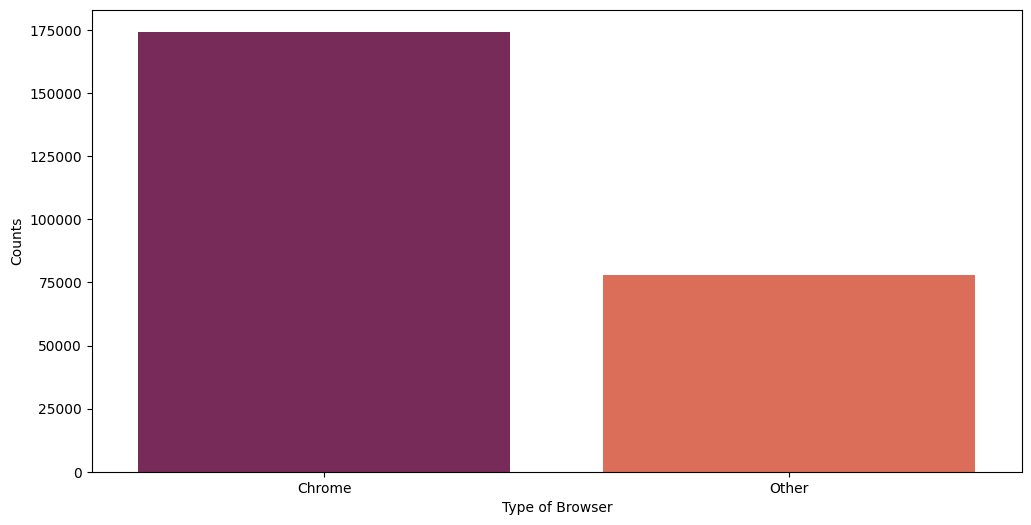

In [25]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = data.index, y = 'Counts', hue = data.index, legend = False, palette = "rocket")
plt.xlabel("Type of Browser")
plt.ylabel("Counts")
plt.show()

In [26]:
# Check OS
train["OS"].unique()

array(['Macintosh', 'Windows', 'Android', 'iOS', 'Linux', 'Tizen',
       'Chrome OS', 'BlackBerry', '(not set)', 'Xbox', 'Samsung',
       'Windows Phone', 'OS/2', 'Nintendo 3DS', 'Playstation Vita',
       'FreeBSD', 'SunOS', 'Nintendo WiiU', 'Firefox OS', 'SymbianOS',
       'Nokia'], dtype=object)

In [27]:
data = train['OS'].value_counts(normalize = True)[:15].to_frame("Ratio").join(
    train['OS'].value_counts(normalize = False)[:15].to_frame("Counts")
)
data

,Ratio,Counts
Windows,0.349278,88119
Macintosh,0.239075,60316
Android,0.205598,51870
iOS,0.118031,29778
Linux,0.037901,9562
Chrome OS,0.036553,9222
(not set),0.010274,2592
Tizen,0.001272,321
Samsung,0.001027,259
Windows Phone,0.000507,128


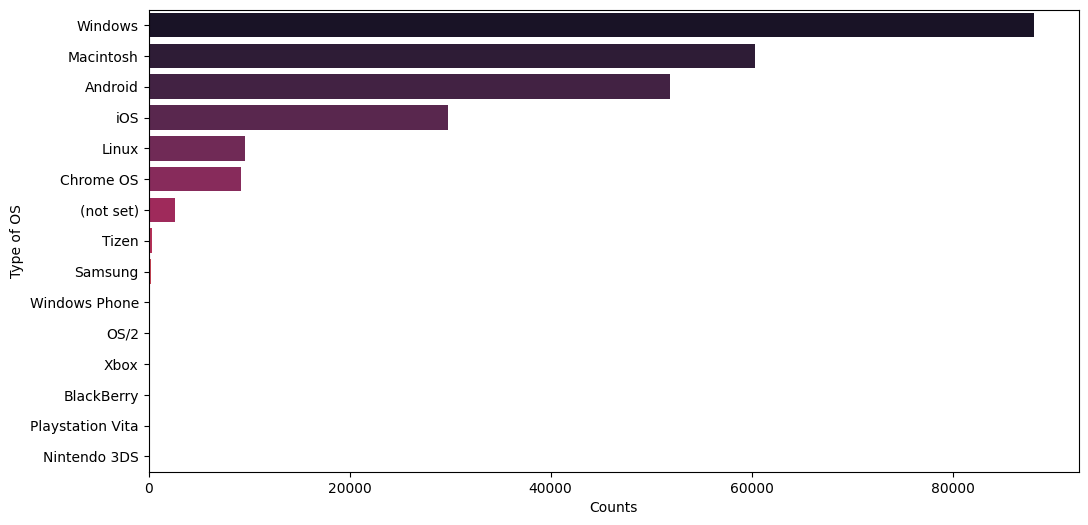

In [28]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket")
plt.xlabel("Counts")
plt.ylabel("Type of OS")
plt.show()

In [29]:
# OS check
main = ["Windows", "Macintosh", "Android", "iOS"]
others_train = [x for x in train["OS"].unique() if x not in main]
others_test = [x for x in test["OS"].unique() if x not in main]

check_db = train.copy()
check_db["category"] = check_db["OS"].apply(lambda x: "main" if x in main else "others")

In [30]:
print((check_db["category"] == "main").sum())
print((check_db["category"] == "others").sum())

230083
22206


In [31]:
# Browser 정리
train["OS"] = train["OS"].apply(lambda x: "Other" if x in others_train else x)
print(train["OS"].unique())

test["OS"] = test["OS"].apply(lambda x: "Other" if x in others_test else x)
print(test["OS"].unique())

['Macintosh' 'Windows' 'Android' 'iOS' 'Other']
['Other' 'iOS' 'Windows' 'Android' 'Macintosh']


In [32]:
data = train['OS'].value_counts(normalize = True).to_frame("Ratio").join(
    train['OS'].value_counts(normalize = False).to_frame("Counts")
)
data

,Ratio,Counts
Windows,0.349278,88119
Macintosh,0.239075,60316
Android,0.205598,51870
iOS,0.118031,29778
Other,0.088018,22206


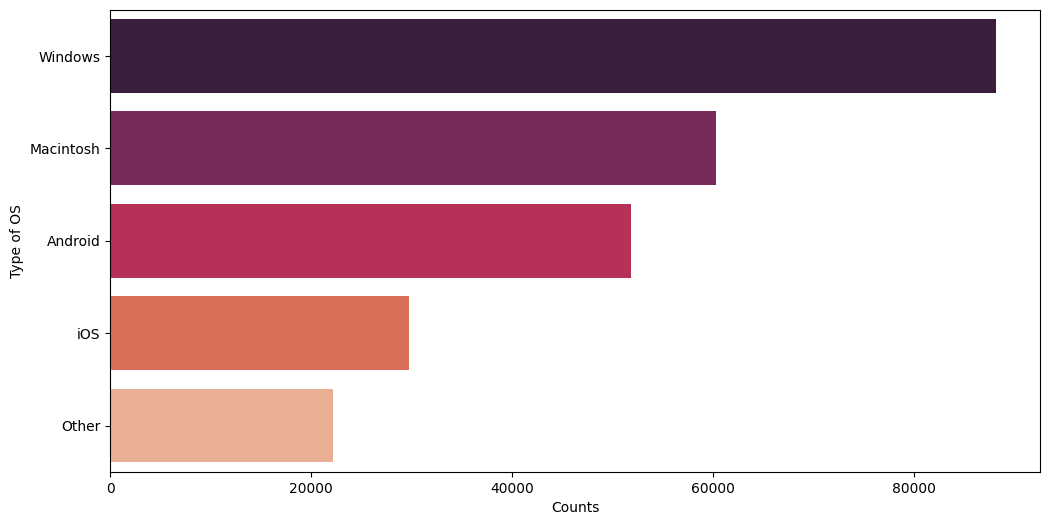

In [33]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket")
plt.xlabel("Counts")
plt.ylabel("Type of OS")
plt.show()

In [34]:
# device check
train["device"].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

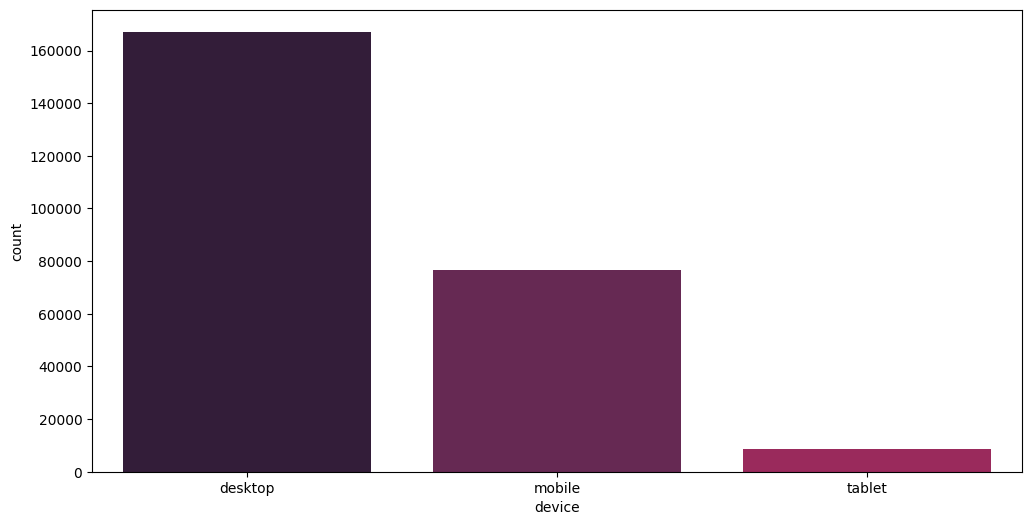

In [35]:
# device 비율 확인

plt.figure(figsize = (12, 6))
sns.countplot(x = train["device"], hue = train["device"], legend = False)
plt.show()

In [37]:
# mobile과 tablet 합치기
train["device"] = train["device"].str.replace('tablet', 'mobile')
print(train["device"].unique())
test["device"] = test["device"].str.replace('tablet', 'mobile')
print(test["device"].unique())

['desktop' 'mobile']
['desktop' 'mobile']


In [91]:
cat_columns

['browser',
 'OS',
 'device',
 'continent',
 'subcontinent',
 'country',
 'traffic_source',
 'traffic_medium',
 'keyword',
 'referral_path']

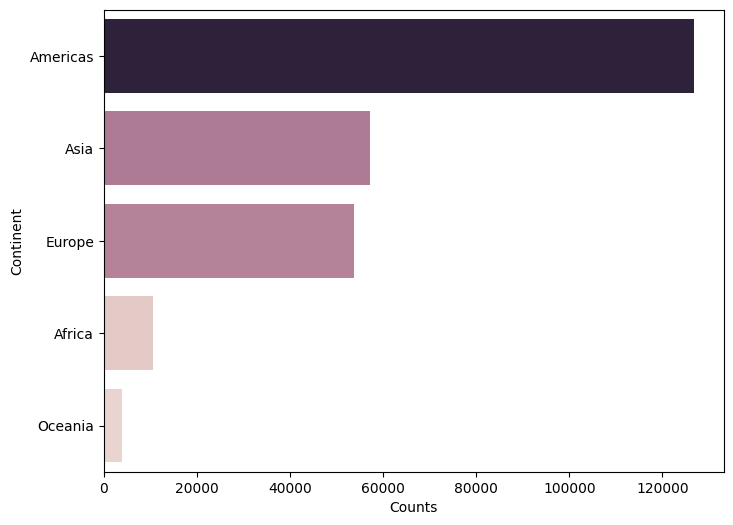

In [122]:
# Check Continent Column
data = train["continent"].value_counts().to_frame()

plt.figure(figsize = (8, 6))
sns.barplot(data = data, x = "continent", y = data.index, hue = "continent", legend = False)
plt.xlabel("Counts")
plt.ylabel("Continent")
plt.show()

In [107]:
train.loc[train["continent"] == (not set)""]

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
978,1.0,Other,iOS,mobile,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),google,cpc,Category9,NaN
1065,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
2012,4.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
2781,1.0,Chrome,Android,mobile,0,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
3077,2.0,Chrome,Android,mobile,0,1.0,8.0,0,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250035,1.0,Chrome,Windows,desktop,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),google,organic,Category8,NaN
250612,1.0,Chrome,Windows,desktop,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),analytics.google.com,referral,NaN,Category3_Path_0013
250654,3.0,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,(not set),(not set),(not set),google,organic,Category8,NaN
251144,1.0,Other,Windows,desktop,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),youtube.com,referral,NaN,Category13_Path_0029


In [112]:
print(train["continent"].mode()[0])
print(train["subcontinent"].mode()[0])
print(train["country"].mode()[0])
print("-" * 20)
print(test["continent"].mode()[0])
print(test["subcontinent"].mode()[0])
print(test["country"].mode()[0])

Americas
Northern America
United States
--------------------
Americas
Northern America
United States


In [117]:
# (not set) value 대체
train["continent"] = train["continent"].replace("(not set)", train["continent"].mode()[0])
train["continent"].unique()

test["continent"] = test["continent"].replace("(not set)", test["continent"].mode()[0])
test["continent"].unique()

array(['Americas', 'Asia', 'Europe', 'Africa', 'Oceania'], dtype=object)

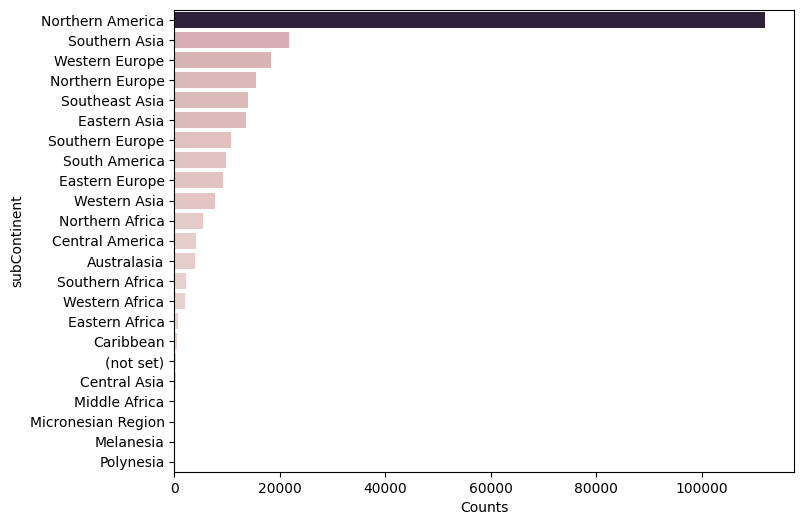

In [123]:
# Check SubContinent Column
data = train["subcontinent"].value_counts().to_frame()

plt.figure(figsize = (8, 6))
sns.barplot(data = data, x = "subcontinent", y = data.index, hue = "subcontinent", legend = False)
plt.xlabel("Counts")
plt.ylabel("subContinent")
plt.show()

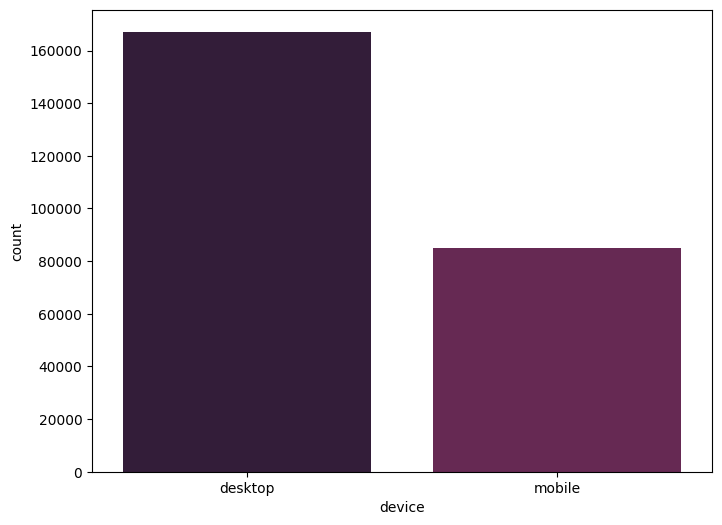

In [50]:
plt.figure(figsize = (8, 6))
sns.countplot(x = train["device"], hue = train["device"], legend = False)
plt.show()

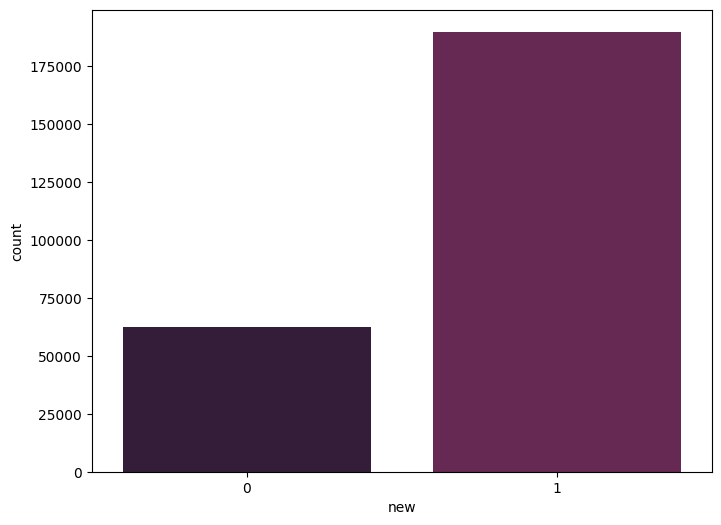

In [51]:
# New Column check

plt.figure(figsize = (8, 6))
sns.countplot(x = train["new"], hue = train["new"], legend = False)
plt.show()

In [52]:
train["quality"].describe()

count    252289.000000
mean          3.816805
std          11.091028
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          98.000000
Name: quality, dtype: float64

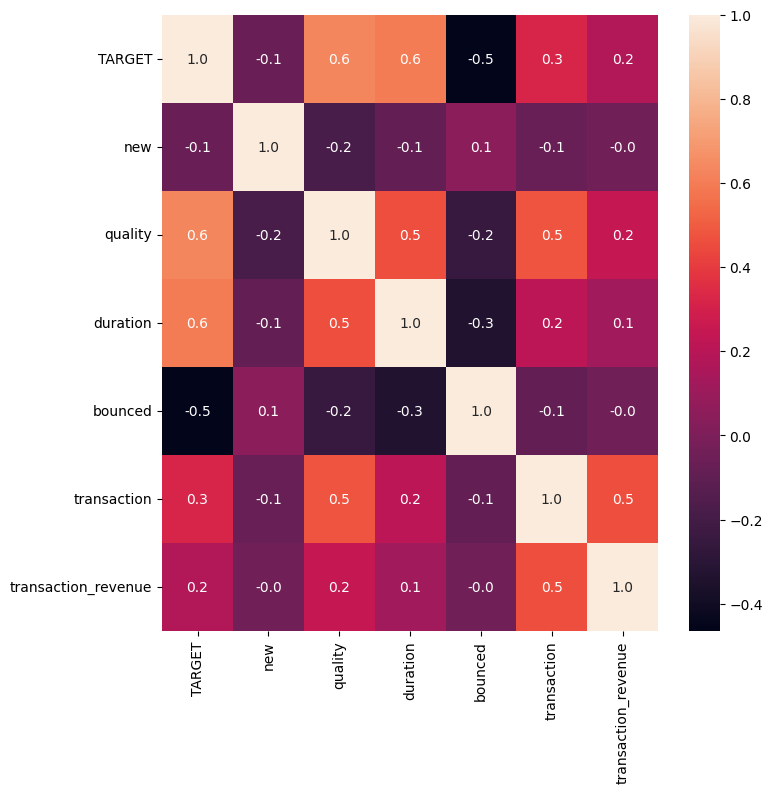

In [57]:
data = train.corr(numeric_only = True)
plt.figure(figsize = (8, 8))
sns.heatmap(data = data, annot = True, fmt = ".1f")
plt.show()